<a href="https://colab.research.google.com/github/Devasy23/Low-Resolution/blob/main/model-backend/research1_autoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## As the worst image quality is in Fishing vessels folder, we will use that folder to train the model




In [ ]:
# as the worst image quality is in Fishing vessels folder, we will use that folder to train the model
path = 'Fishing vessel'
import os

images = os.listdir(path)
# for i in images:
#     print(i)


# To view some images

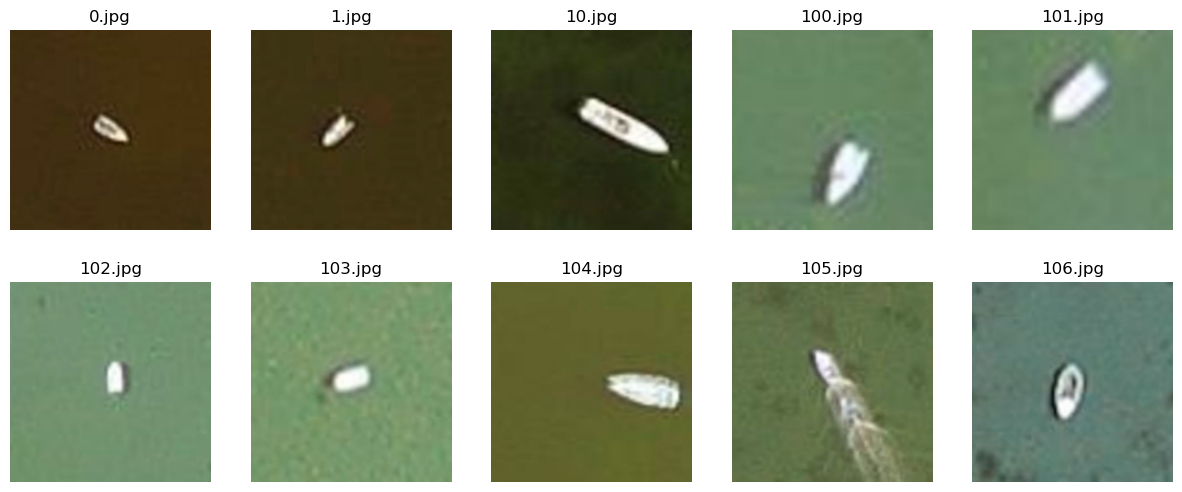

In [ ]:
# view some images
# plt.imshow(cv2.imread('Fishing vessel\\d0003_png.rf.2f66e0edf6ca47fe60072754e297c801.jpg'), cmap='gray')

import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i in range(10):
    img = cv2.imread('Fishing vessel\\'+images[i])
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(images[i])
    axs[i].axis('off')

plt.show()



# Applied Laplacian filter to the image
- ## Laplacian filter is a second derivative edge detection filter
- ## It is used to find edges in an image
- ## It is very sensitive to noise
- ## It is used to sharpen an image
- ## It is used to detect edges in an image
- ## It is used to enhance edges in an image

# 0 1 0
# 1 -4 1
# 0 1 0

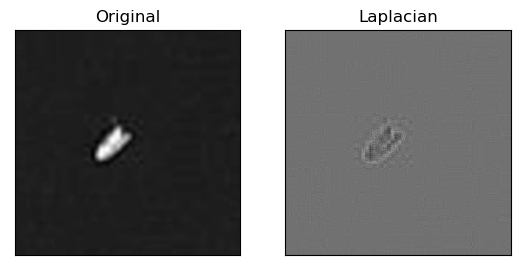

In [ ]:
# apply laplacian mask to image, to get boundary details
# https://www.youtube.com/watch?v=ZmYPzESC5YY

# 0 1 0
# 1 -4 1
# 0 1 0

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Data//Fishing vessel//1.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)


plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

# Apply laplacian with diagonal neighbors

# 1  1  1
# 1 -8  1
# 1  1  1

  


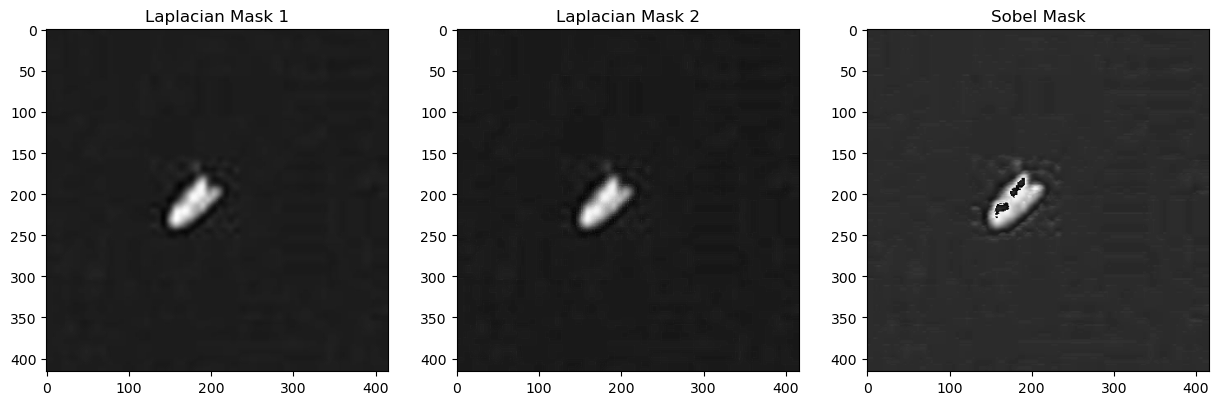

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def applyLaplacian(laplacianMask, img):
  # Apply laplacian filter to the image
    filteredImg = cv2.filter2D(img, -1, laplacianMask)

  # Add the filtered image to the original image to enhance the boundary information
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))

    return finalImg

def applySobel(sobelMask, img):
  # Apply sobel filter to the image
    filteredImg = cv2.filter2D(img, -1, sobelMask)

  # Add the filtered image to the original image to enhance the boundary information
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))

    return finalImg

# Load the image
img = cv2.imread('Data//Fishing vessel//1.jpg',0)

laplacianMask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
final_img = applyLaplacian(laplacianMask, img)

laplacianMask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
final_img2 = applyLaplacian(laplacianMask2, img)

sobelMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
final_img3 = applySobel(sobelMask, img)

# Display the images side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].imshow(final_img, cmap='gray')
axs[0].set_title('Laplacian Mask 1')
axs[1].imshow(final_img2, cmap='gray')
axs[1].set_title('Laplacian Mask 2')
axs[2].imshow(final_img3, cmap='gray')
axs[2].set_title('Sobel Mask')
plt.show()


# Now try histogram equalization
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html



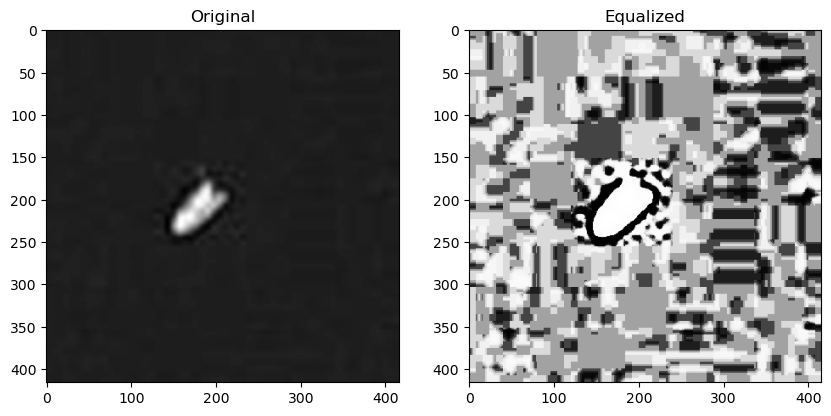

In [ ]:
def hist_equalization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img
# Load the image
img = cv2.imread('Fishing vessel//1.jpg',0)

# Apply the histogram equalization method
equ = cv2.equalizeHist(img)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(equ, cmap='gray'),plt.title('Equalized')
plt.show()


In [ ]:
# rename images in folders to 1.jpg, 2.jpg, 3.jpg, etc.
# import os
# folders = os.listdir('Data')
# for folder in folders:
#     print(folder)
#     images = os.listdir('Data/'+folder)
#     for i in range(len(images)):
#         os.rename('Data/'+folder+'/'+images[i], 'Data/'+folder+'/'+str(i)+'.jpg')



In [ ]:
# train Xtratrees model
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

img = []
classes = []

for i in os.listdir('Data'):
    for j in os.listdir('Data/'+i):
        temp = cv2.imread('Data/'+i+'/'+j)
        #convert to gray scale
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        temp = cv2.resize(temp, (224,224))
        # flatten the image
        temp = temp.flatten()
        img.append(temp)
        classes.append(i)

img = np.array(img)
classes = np.array(classes)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(img, classes, test_size=0.3, stratify=classes)

In [ ]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
print(model.feature_importances_)
# feat_importances = pd.Series(model.feature_importances_, index=xtrain.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()


[0.         0.         0.         ... 0.00087713 0.00010591 0.0003238 ]


In [ ]:
# print accuracy of model
ypred = model.predict(xtest)
print("Accuracy:",accuracy_score(ytest, ypred))
print("Classification Report:", classification_report(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
# print("roc_auc_score", roc_auc_score(ytest, ypred))



Accuracy: 0.92
Classification Report:                                 precision    recall  f1-score   support

                Fishing vessel       0.94      0.96      0.95        79
                         cargo       0.96      0.79      0.87        33
fishing vessels or small ships       0.76      1.00      0.87        13

                      accuracy                           0.92       125
                     macro avg       0.89      0.92      0.89       125
                  weighted avg       0.93      0.92      0.92       125

Confusion Matrix:
 [[76  1  2]
 [ 5 26  2]
 [ 0  0 13]]


In [ ]:
# now train model 2 after applying digital filter to the data
img = []
classes = []

for i in os.listdir('Data'):
    for j in os.listdir('Data/'+i):
        temp = cv2.imread('Data/'+i+'/'+j)
        #convert to gray scale
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        # apply digital filter
        temp = applyLaplacian(laplacianMask, temp)
        temp = cv2.resize(temp, (224,224))
        # flatten the image
        temp = temp.flatten()
        img.append(temp)
        classes.append(i)

img_laplacian = np.array(img)
classes = np.array(classes)

In [ ]:
# split the data into train and test

xtrain, xtest, ytrain, ytest = train_test_split(img_laplacian, classes, test_size=0.3, random_state=0, stratify=classes)

In [ ]:
model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model2.fit(xtrain, ytrain)
y_pred2 = model2.predict(xtest)
print("Accuracy:",accuracy_score(ytest, y_pred2))
print("Classification Report:",classification_report(ytest, y_pred2))
print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))



Accuracy: 0.872
Classification Report:                                 precision    recall  f1-score   support

                Fishing vessel       0.88      0.97      0.92        79
                         cargo       0.91      0.64      0.75        33
fishing vessels or small ships       0.79      0.85      0.81        13

                      accuracy                           0.87       125
                     macro avg       0.86      0.82      0.83       125
                  weighted avg       0.88      0.87      0.87       125

Confusion Matrix:
 [[77  2  0]
 [ 9 21  3]
 [ 2  0 11]]


In [ ]:
def trymask(laplacianMask):
    img = []
    classes = []

    for i in os.listdir('Data'):
        for j in os.listdir('Data/'+i):
            temp = cv2.imread('Data/'+i+'/'+j)
          #convert to gray scale
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
          # apply digital filter
            temp = applyLaplacian(laplacianMask, temp)
            temp = cv2.resize(temp, (224,224))
          # flatten the image
            temp = temp.flatten()
            img.append(temp)
            classes.append(i)

    img_laplacian = np.array(img)
    classes = np.array(classes)
    # split the data into train and test
    xtrain, xtest, ytrain, ytest = train_test_split(img_laplacian, classes, test_size=0.3, random_state=0, stratify=classes)
    model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    model2.fit(xtrain, ytrain)
    y_pred2 = model2.predict(xtest)
    print("Accuracy:",accuracy_score(ytest, y_pred2))
    print("Classification Report:",classification_report(ytest, y_pred2))
    print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))
    return model2

mdl = trymask(laplacianMask2)

Accuracy: 0.832
Classification Report:                                 precision    recall  f1-score   support

                Fishing vessel       0.81      0.99      0.89        79
                         cargo       0.94      0.48      0.64        33
fishing vessels or small ships       0.83      0.77      0.80        13

                      accuracy                           0.83       125
                     macro avg       0.86      0.75      0.78       125
                  weighted avg       0.85      0.83      0.82       125

Confusion Matrix:
 [[78  1  0]
 [15 16  2]
 [ 3  0 10]]


|Model Name|Accuracy|
|---|---|
|Laplacian+Model|87.4|
|Laplacian2+Model|83.2|
|Sobel+Model|84.8|
|Model|87.8|



# Ensemble Learning Models

#### XGBoost

In [ ]:
def trymask(laplacianMask):
    img = []
    classes = []

    for i in os.listdir('Data'):
        for j in os.listdir('Data/'+i):
            temp = cv2.imread('Data/'+i+'/'+j)
            # convert to gray scale
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
            # apply digital filter
            temp = applyLaplacian(laplacianMask, temp)
            temp = cv2.resize(temp, (224,224))
            # flatten the image
            temp = temp.flatten()
            img.append(temp)
            classes.append(i)

    img_laplacian = np.array(img)
    classes = np.array(classes)

    encoded_classes = LabelEncoder().fit_transform(classes)
    # split the data into train and test
    xtrain, xtest, ytrain, ytest = train_test_split(img_laplacian, encoded_classes, test_size=0.3, random_state=0, stratify=classes)
    model2 = xgb.XGBClassifier(n_estimators=100, random_state=0)
    model2.fit(xtrain, ytrain)
    y_pred2 = model2.predict(xtest)
    print("Accuracy:",accuracy_score(ytest, y_pred2))
    print("Classification Report:",classification_report(ytest, y_pred2))
    print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))
    return model2

mdl = trymask(laplacianMask2)

Accuracy: 0.864
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.99      0.90        79
           1       0.95      0.61      0.74        33
           2       1.00      0.77      0.87        13

    accuracy                           0.86       125
   macro avg       0.93      0.79      0.84       125
weighted avg       0.88      0.86      0.86       125

Confusion Matrix:
 [[78  1  0]
 [13 20  0]
 [ 3  0 10]]


#### LGBM

In [ ]:
def trymask(laplacianMask):
    img = []
    classes = []

    for i in os.listdir('Data'):
        for j in os.listdir('Data/'+i):
            temp = cv2.imread('Data/'+i+'/'+j)
            # convert to gray scale
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
            # apply digital filter
            temp = applyLaplacian(laplacianMask, temp)
            temp = cv2.resize(temp, (224,224))
            # flatten the image
            temp = temp.flatten()
            img.append(temp)
            classes.append(i)

    img_laplacian = np.array(img)
    classes = np.array(classes)

    encoded_classes = LabelEncoder().fit_transform(classes)
    # split the data into train and test
    xtrain, xtest, ytrain, ytest = train_test_split(img_laplacian, encoded_classes, test_size=0.3, random_state=0, stratify=classes)
    model2 = LGBMClassifier(n_estimators=100, random_state=0)
    model2.fit(xtrain, ytrain)
    y_pred2 = model2.predict(xtest)
    print("Accuracy:",accuracy_score(ytest, y_pred2))
    print("Classification Report:",classification_report(ytest, y_pred2))
    print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))
    return model2

mdl = trymask(laplacianMask2)

Accuracy: 0.84
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.96      0.90        79
           1       0.83      0.58      0.68        33
           2       0.83      0.77      0.80        13

    accuracy                           0.84       125
   macro avg       0.83      0.77      0.79       125
weighted avg       0.84      0.84      0.83       125

Confusion Matrix:
 [[76  3  0]
 [12 19  2]
 [ 2  1 10]]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.utils import plot_model

# Define the input shape
input_shape = (32, 32, 3)

# Define the three models
model1_input = Input(shape=input_shape)
model1_output = model1(model1_input)

model2_input = Input(shape=input_shape)
model2_output = model2(model2_input)

model3_input = Input(shape=input_shape)
model3_output = model3(model3_input)

# Concatenate the outputs of the three models
merged = concatenate([model1_output, model2_output, model3_output])

# Define the ensemble model
ensemble_model = Model(inputs=[model1_input, model2_input, model3_input], outputs=merged)

# Compile the ensemble model
ensemble_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Plot the ensemble model
plot_model(ensemble_model, show_shapes=True, to_file='ensemble_model.png')

In [2]:
# import models
import cv2
import numpy as np
import os
# Load the image
X = []
y  = []
PATH = '/content/drive/MyDrive/Data'
for idx, imgclass in enumerate(os.listdir(PATH)):
    for img in os.listdir(PATH+'/'+imgclass):
        img = cv2.imread(PATH+'/'+imgclass+'/'+img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (256,256))
        X.append(img)
        y.append(idx)
X = np.array(X)
y = np.array(y)

In [3]:
X.shape, y.shape

((4472, 256, 256), (4472,))

In [4]:
# build an auto encoder model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape
input_img = Input(shape=(256, 256, 1))

# Define the encoder part
encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32
encoder = MaxPooling2D((2, 2), padding='same')(encoder) #64
encoder = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder) #128
encoder = MaxPooling2D((2, 2), padding='same')(encoder) #256
encoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder) #512
encoder = MaxPooling2D((2, 2), padding='same')(encoder) #1024

# Define the decoder part
decoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder) #512
decoder = UpSampling2D((2, 2))(decoder) #1024
decoder = Conv2D(16, (3, 3), activation='relu', padding='same')(decoder) #128
decoder = UpSampling2D((2, 2))(decoder) #256
decoder = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder) #64
decoder = UpSampling2D((2, 2))(decoder) #128
decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder) #128

# Define the autoencoder model
autoencoder = Model(input_img, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)



autoencoder.fit(xtrain, xtrain, epochs=50, batch_size=128, callbacks=[early_stopping])

# Predict the autoencoder output from corrupted test images
pred = autoencoder.predict(xtest)


In [7]:
encoder = Model(input_img, encoder)
encoded_imgs = encoder.predict(xtest)

42/42 [==============================] - 0s 9ms/step


(256, 256)
(1, 256, 256)
1/1 [==============================] - 0s 35ms/step
(256, 256, 1)


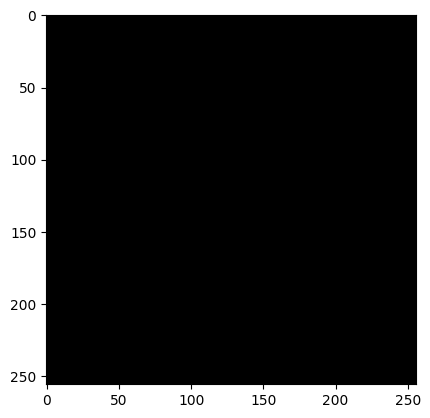

In [23]:
img = cv2.imread("/content/drive/MyDrive/Data/Container/116Container.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (256,256))
x=[]
print(img.shape)
x.append(img)
x = np.array(x)
print(x.shape)

from matplotlib import pyplot as plt
oup = autoencoder.predict(x)
print(oup[0].shape)
plt.imshow(oup[0], cmap='gray')
# img = cv2.imreard("", cv2.IM)

In [39]:
# use encoded images to train the model
xtrain_encoded = encoder.predict(xtrain)
xtest_encoded = encoder.predict(xtest)

# flatten the encoded images
xtrain_encoded = xtrain_encoded.reshape(len(xtrain_encoded), np.prod(xtrain_encoded.shape[1:]))
xtest_encoded = xtest_encoded.reshape(len(xtest_encoded), np.prod(xtest_encoded.shape[1:]))

from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model2.fit(xtrain_encoded, ytrain)
y_pred2 = model2.predict(xtest_encoded)

# print accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Accuracy:",accuracy_score(ytest, y_pred2))
print("Classification Report:",classification_report(ytest, y_pred2))
print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))

42/42 [==============================] - 0s 6ms/step
Accuracy: 0.9120715350223547
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95       568
           1       0.89      0.98      0.94       603
           2       0.87      0.43      0.58        90
           3       0.95      0.78      0.85        49
           4       0.69      0.28      0.40        32

    accuracy                           0.91      1342
   macro avg       0.87      0.69      0.74      1342
weighted avg       0.91      0.91      0.90      1342

Confusion Matrix:
 [[545  18   2   2   1]
 [  6 593   3   0   1]
 [ 14  36  39   0   1]
 [  2   7   1  38   1]
 [ 13  10   0   0   9]]


In [24]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=56ccf69fbbc9d1251c88fde3ed6f24e6742b31672701ab74a47630a9a4ae2949
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lime
import lime.lime_tabular
import numpy as np

# Assuming xtrain_encoded and xtest_encoded are your training and testing data

# Train your model
model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model2.fit(xtrain_encoded, ytrain)

# Make predictions on the test set
y_pred2 = model2.predict(xtest_encoded)

# Print accuracy of the model
print("Accuracy:", accuracy_score(ytest, y_pred2))
print("Classification Report:", classification_report(ytest, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred2))

# Lime setup
explainer = lime.lime_tabular.LimeTabularExplainer(xtrain_encoded, feature_names=list(range(xtrain_encoded.shape[1])), class_names=np.unique(ytrain), discretize_continuous=True)

# Choose a sample index for explanation
sample_idx = 11
sample = xtest_encoded[sample_idx]

# Explain the prediction made by the model on the chosen sample
lime_exp = explainer.explain_instance(sample, model2.predict_proba)

# Show Lime explanation in notebook
lime_exp.show_in_notebook(show_table=True)


Accuracy: 0.9120715350223547
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95       568
           1       0.89      0.98      0.94       603
           2       0.87      0.43      0.58        90
           3       0.95      0.78      0.85        49
           4       0.69      0.28      0.40        32

    accuracy                           0.91      1342
   macro avg       0.87      0.69      0.74      1342
weighted avg       0.91      0.91      0.90      1342

Confusion Matrix:
 [[545  18   2   2   1]
 [  6 593   3   0   1]
 [ 14  36  39   0   1]
 [  2   7   1  38   1]
 [ 13  10   0   0   9]]


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lime
from lime.lime_tabular import LimeTabularExplainer

model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model2.fit(xtrain_encoded, ytrain)

# Make predictions on the test set
y_pred2 = model2.predict(xtest_encoded)

# Print accuracy of the model
print("Accuracy:", accuracy_score(ytest, y_pred2))
print("Classification Report:", classification_report(ytest, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred2))

# Lime setup
explainer = lime.lime_tabular.LimeTabularExplainer(xtrain_encoded, feature_names=list(range(xtrain_encoded.shape[1])), class_names=np.unique(ytrain), discretize_continuous=True)

# Choose a sample index for explanation
sample_idx = 11
sample = xtest_encoded[sample_idx]

# Explain the prediction made by the model on the chosen sample
lime_exp = explainer.explain_instance(sample, model2.predict_proba)

# Save the explanation to a .png file
lime_exp.save_to_file('lime_explanation.png')

# Optionally, display the explanation in the notebook
lime_exp.show_in_notebook(show_table=True)


Accuracy: 0.9120715350223547
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95       568
           1       0.89      0.98      0.94       603
           2       0.87      0.43      0.58        90
           3       0.95      0.78      0.85        49
           4       0.69      0.28      0.40        32

    accuracy                           0.91      1342
   macro avg       0.87      0.69      0.74      1342
weighted avg       0.91      0.91      0.90      1342

Confusion Matrix:
 [[545  18   2   2   1]
 [  6 593   3   0   1]
 [ 14  36  39   0   1]
 [  2   7   1  38   1]
 [ 13  10   0   0   9]]


In [51]:
from lime import lime_image
from skimage.color import rgb2gray
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

# Assume 'model' is your autoencoder model and 'xtrain' contains your training images

# LIME image explainer setup
explainer = lime_image.LimeImageExplainer(random_state=123)

# Define a function to make predictions on images using the autoencoder
def make_prediction(color_img):
    gray_img = rgb2gray(color_img).reshape(-1, 256, 256, 1)

    # Encode the grayscale image
    enc = encoder.predict(gray_img)
    print(enc.shape)

    # Reduce the size by averaging or pooling along certain dimensions
    reduced_enc = np.mean(enc, axis=(0))  # Example: average pooling

    # Reshape to (1, 8192) before feeding to the classifier
    flatten = reduced_enc.reshape(1, -1)
    print(flatten.shape)
    # xtrain_encoded.reshape(len(xtrain_encoded), np.prod(xtrain_encoded.shape[1:]))
    # Make predictions using the ExtraTreesClassifier
    preds = model2.predict(flatten)
    print(preds)
    return preds

# Choose an image index to explain
image_index = 111
x = xtrain[image_index]

# Ensure that x is a 2D image array
# x_2d = x.squeeze()

# Generate explanations for the chosen image
explanation = explainer.explain_instance(x, make_prediction, hide_color=0, random_seed=123)

# Display the original image with marked boundaries from LIME explanation
plt.imshow(mark_boundaries(explanation.image, explanation.segments))
plt.show()



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 27ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 32ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 33ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 32ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 29ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 29ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 34ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 40ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 28ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 19ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [==============================] - 0s 19ms/step
(10, 32, 32, 8)
(1, 8192)
[1]
1/1 [===========

IndexError: ignored

In [ ]:
x_final = np.concatenate((xtrain_encoded, xtest_encoded), axis=0)
y_final = np.concatenate((ytrain, ytest), axis=0)
ypred_all = model2.predict(x_final)


In [ ]:
print("Accuracy:",accuracy_score(y_final, ypred_all))
print("Classification Report:",classification_report(y_final, ypred_all))
print("Confusion Matrix:\n",confusion_matrix(y_final, ypred_all))

Accuracy: 0.9807142857142858
Classification Report:               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1892
           2       0.97      1.00      0.98      2009
           3       0.99      0.82      0.90       299

    accuracy                           0.98      4200
   macro avg       0.98      0.93      0.96      4200
weighted avg       0.98      0.98      0.98      4200

Confusion Matrix:
 [[1873   18    1]
 [   6 2002    1]
 [  15   40  244]]


In [ ]:
import models
vclf = models.model_selector(X, y)

laplacian1
Model laplacian1 extra_trees trained and gave accuracy 0.9365079365079365
